In [1]:
PSDS_PATH = '/Users/youngeun/prac_stat'

- Load files

lung <- read.csv(file.path(PSDS_PATH, 'data', 'LungDisease.csv'))  
house <- read.csv(file.path(PSDS_PATH, 'data', 'house_sales.csv'), sep='\t')

In [2]:
library(MASS)
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(splines)
library(mgcv)


다음의 패키지를 부착합니다: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


필요한 패키지를 로딩중입니다: nlme


다음의 패키지를 부착합니다: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



### 🫁 폐 기능 지표 데이터

In [3]:
lung <- read.csv(file.path(PSDS_PATH, 'data', 'LungDisease.csv'))

In [11]:
nrow(lung)

[1] 122

In [11]:
head(lung)

,PEFR,Exposure
,<int>,<int>
1,390,0
2,410,0
3,430,0
4,460,0
5,420,1
6,280,2


In [5]:
# linear model 
model <- lm(PEFR ~ Exposure, data=lung)

In [6]:
model


Call:
lm(formula = PEFR ~ Exposure, data = lung)

Coefficients:
(Intercept)     Exposure  
    424.583       -4.185  


In [7]:
fitted <- predict(model)
residu <- residuals(model)

In [9]:
fitted # 식에 맞춰서 대입한 각 row 값들 

1        2        3        4        5        6        7        8 
424.5828 424.5828 424.5828 424.5828 420.3982 416.2137 416.2137 416.2137 
       9       10       11       12       13       14       15       16 
412.0291 412.0291 412.0291 412.0291 412.0291 412.0291 407.8445 407.8445 
      17       18       19       20       21       22       23       24 
407.8445 407.8445 407.8445 407.8445 403.6599 399.4753 399.4753 399.4753 
      25       26       27       28       29       30       31       32 
399.4753 399.4753 395.2908 395.2908 395.2908 395.2908 395.2908 395.2908 
      33       34       35       36       37       38       39       40 
395.2908 391.1062 386.9216 382.7370 382.7370 382.7370 374.3679 374.3679 
      41       42       43       44       45       46       47       48 
370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 370.1833 
      49       50       51       52       53       54       55       56 
365.9987 365.9987 365.9987 365.9987 365.9987 365.9987 361.8142 361.8142 
      57       58       59       60       61       62       63       64 
361.8142 357.6296 357.6296 353.4450 353.4450 353.4450 353.4450 353.4450 
      65       66       67       68       69       70       71       72 
353.4450 349.2604 349.2604 349.2604 349.2604 345.0759 345.0759 345.0759 
      73       74       75       76       77       78       79       80 
345.0759 345.0759 345.0759 345.0759 345.0759 345.0759 345.0759 345.0759 
      81       82       83       84       85       86       87       88 
345.0759 345.0759 340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 
      89       90       91       92       93       94       95       96 
340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 
      97       98       99      100      101      102      103      104 
340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 340.8913 
     105      106      107      108      109      110      111      112 
336.7067 336.7067 336.7067 336.7067 336.7067 336.7067 336.7067 336.7067 
     113      114      115      116      117      118      119      120 
336.7067 336.7067 332.5221 332.5221 332.5221 332.5221 332.5221 332.5221 
     121      122 
328.3375 328.3375

In [12]:
residu

1            2            3            4            5            6 
 -34.5828066  -14.5828066    5.4171934   35.4171934   -0.3982301 -136.2136536 
           7            8            9           10           11           12 
   3.7863464  103.7863464  197.9709229  177.9709229   17.9709229   -2.0290771 
          13           14           15           16           17           18 
 -52.0290771  -92.0290771 -297.8445006  -17.8445006   -7.8445006   12.1554994 
          19           20           21           22           23           24 
  42.1554994  112.1554994   56.3400759 -199.4753477   -9.4753477  -59.4753477 
          25           26           27           28           29           30 
  50.5246523  150.5246523  -95.2907712  -75.2907712  -55.2907712  -35.2907712 
          31           32           33           34           35           36 
  34.7092288   84.7092288  164.7092288  108.8938053  -76.9216182   47.2629583 
          37           38           39           40           41           42 
 117.2629583  127.2629583 -124.3678887   35.6321113 -150.1833123  -70.1833123 
          43           44           45           46           47           48 
 -30.1833123  -10.1833123   29.8166877   79.8166877  119.8166877  129.8166877 
          49           50           51           52           53           54 
-165.9987358 -145.9987358  -45.9987358   -5.9987358   44.0012642   54.0012642 
          55           56           57           58           59           60 
  18.1858407   48.1858407   88.1858407 -137.6295828  -37.6295828 -223.4450063 
          61           62           63           64           65           66 
-133.4450063  -33.4450063    6.5549937    6.5549937  136.5549937 -129.2604298 
          67           68           69           70           71           72 
-119.2604298  -39.2604298  110.7395702 -185.0758534 -145.0758534 -125.0758534 
          73           74           75           76           77           78 
 -65.0758534  -55.0758534  -35.0758534  -25.0758534  -15.0758534   14.9241466 
          79           80           81           82           83           84 
  44.9241466   54.9241466   84.9241466  164.9241466 -190.8912769 -150.8912769 
          85           86           87           88           89           90 
-140.8912769 -130.8912769 -100.8912769 -120.8912769  -90.8912769  -80.8912769 
          91           92           93           94           95           96 
 -60.8912769  -50.8912769  -40.8912769  -30.8912769  -20.8912769  -10.8912769 
          97           98           99          100          101          102 
  19.1087231   49.1087231   59.1087231   89.1087231  119.1087231  129.1087231 
         103          104          105          106          107          108 
 149.1087231  209.1087231  -56.7067004  -46.7067004  -16.7067004   -6.7067004 
         109          110          111          112          113          114 
  13.2932996   33.2932996   53.2932996   63.2932996  173.2932996  193.2932996 
         115          116          117          118          119          120 
 -52.5221239   27.4778761   67.4778761  117.4778761  157.4778761  167.4778761 
         121          122 
  41.6624526   61.6624526

In [37]:
# visualizing residus
lung1 <- lung %>% # pipe operator
  mutate(Fitted=fitted,
         positive = PEFR > Fitted) %>%
  group_by(Exposure, positive) %>%
  summarize(PEFR_max = max(PEFR), 
            PEFR_min = min(PEFR),
            Fitted = first(Fitted), # 이어서
            .groups='keep') %>%
  ungroup() %>%
  mutate(PEFR = ifelse(positive, PEFR_max, PEFR_min)) %>% # positive는 그룹화 기준 중에 하나! 
  arrange(Exposure)

In [38]:
head(lung1)

Exposure,positive,PEFR_max,PEFR_min,Fitted,PEFR
<int>,<lgl>,<int>,<int>,<dbl>,<int>
0,FALSE,410,390,424.5828,390
0,TRUE,460,430,424.5828,460
1,FALSE,420,420,420.3982,420
2,FALSE,280,280,416.2137,280
2,TRUE,520,420,416.2137,520
3,FALSE,410,320,412.0291,320


In [44]:
nrow(lung1)

[1] 38

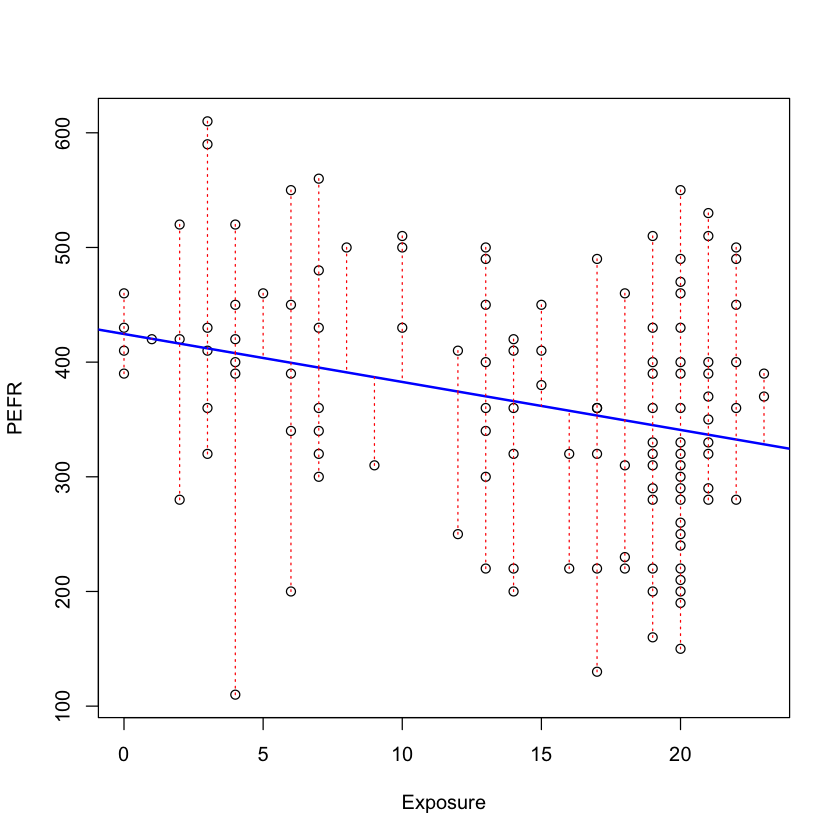

In [24]:
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)
segments(lung1$Exposure, lung1$PEFR, lung1$Exposure, lung1$Fitted, col="red", lty=3)

###### ✔︎ summarize .groups options 탐방

In [13]:
# 예시 데이터프레임 생성
data <- data.frame(
  category1 = c("A", "A", "B", "B", "C", "C"),
  category2 = c("X", "Y", "X", "Y", "X", "Y"),
  value = c(10, 20, 30, 40, 50, 60)
)

In [14]:
# drop
result_drop <- data %>%
  group_by(category1, category2) %>%
  summarize(total_value = sum(value), .groups = 'drop')

print(result_drop)

# A tibble: 6 × 3
  category1 category2 total_value
  <chr>     <chr>           <dbl>
1 A         X                  10
2 A         Y                  20
3 B         X                  30
4 B         Y                  40
5 C         X                  50
6 C         Y                  60


In [15]:
# keep
result_keep <- data %>%
  group_by(category1, category2) %>%
  summarize(total_value = sum(value), .groups = 'keep')

print(result_keep)

# A tibble: 6 × 3
# Groups:   category1, category2 [6]
  category1 category2 total_value
  <chr>     <chr>           <dbl>
1 A         X                  10
2 A         Y                  20
3 B         X                  30
4 B         Y                  40
5 C         X                  50
6 C         Y                  60


In [16]:
group_vars(result_keep)

[1] "category1" "category2"

In [17]:
group_vars(result_drop)

character(0)

In [18]:
# drop_last
result_drop_last <- data %>%
  group_by(category1, category2) %>%
  summarize(total_value = sum(value), .groups = 'drop_last')

print(result_drop_last)

# A tibble: 6 × 3
# Groups:   category1 [3]
  category1 category2 total_value
  <chr>     <chr>           <dbl>
1 A         X                  10
2 A         Y                  20
3 B         X                  30
4 B         Y                  40
5 C         X                  50
6 C         Y                  60


In [19]:
group_vars(result_drop_last)

[1] "category1"

In [20]:
data <- tibble(
  group1 = c("A", "A", "B", "B", "C", "C"),
  group2 = c("X", "X", "Y", "Y", "Z", "Z"),
  value1 = c(10, 20, 30, 40, 50, 60),
  value2 = c(1, 2, 3, 4, 5, 6)
)

In [21]:
# rowwise를 사용하여 각 행별로 value1과 value2의 합계 계산
result_rowwise <- data %>%
  rowwise() %>%
  mutate(total_value = sum(value1, value2))

print(result_rowwise)

# A tibble: 6 × 5
# Rowwise: 
  group1 group2 value1 value2 total_value
  <chr>  <chr>   <dbl>  <dbl>       <dbl>
1 A      X          10      1          11
2 A      X          20      2          22
3 B      Y          30      3          33
4 B      Y          40      4          44
5 C      Z          50      5          55
6 C      Z          60      6          66


In [22]:
group_vars(result_rowwise)

character(0)

###### done

###### ✔︎ 그래프 요소별 중간결과 확인

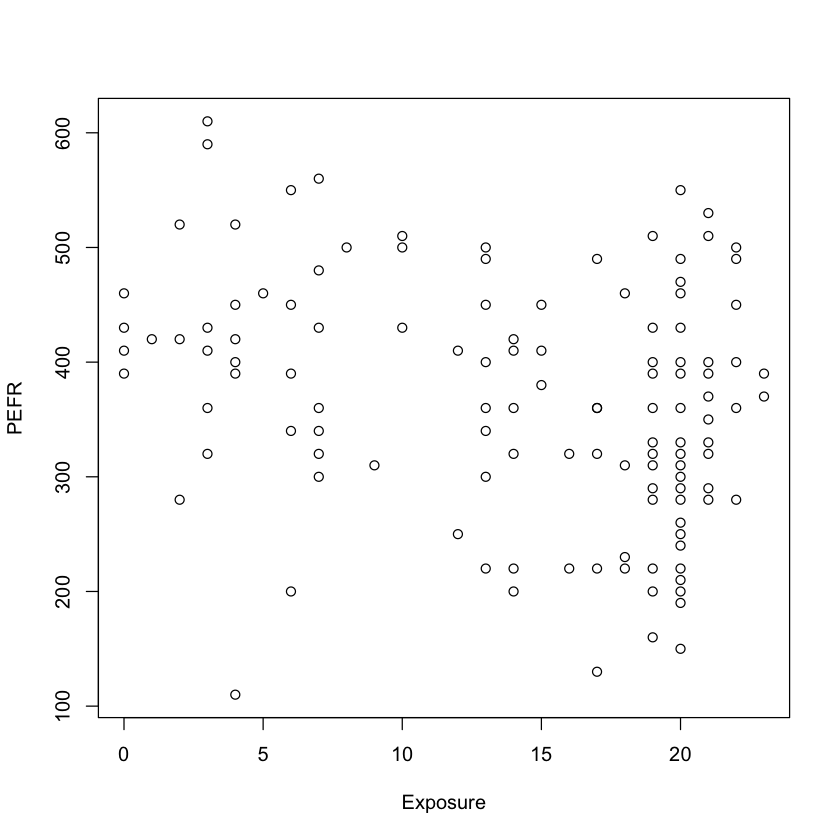

In [32]:
# 모든 데이터 포인트
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")

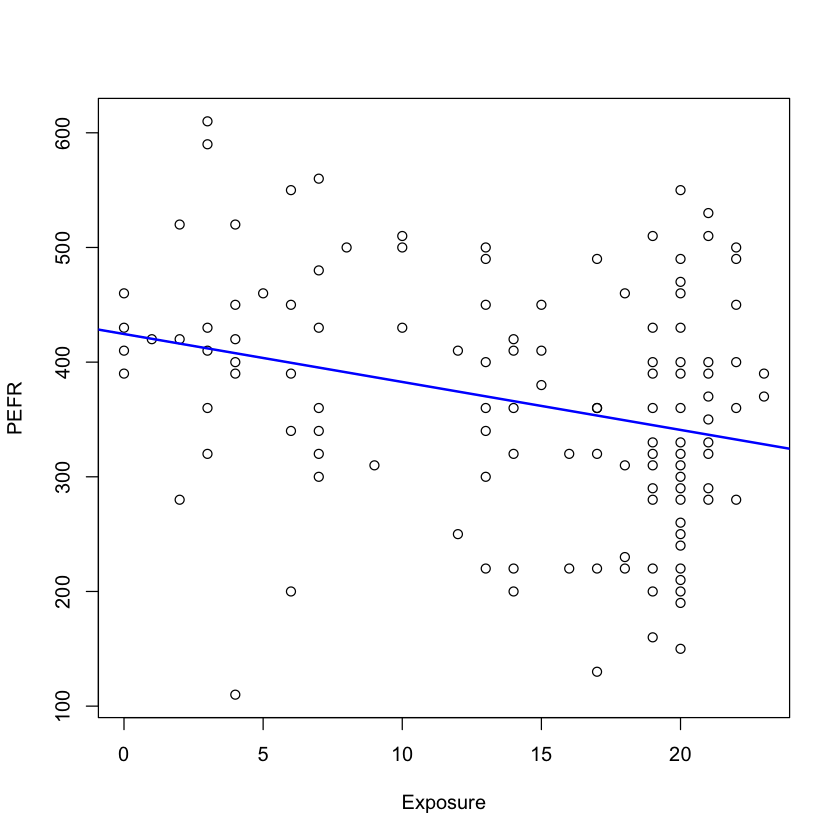

In [34]:
# 회귀선
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)

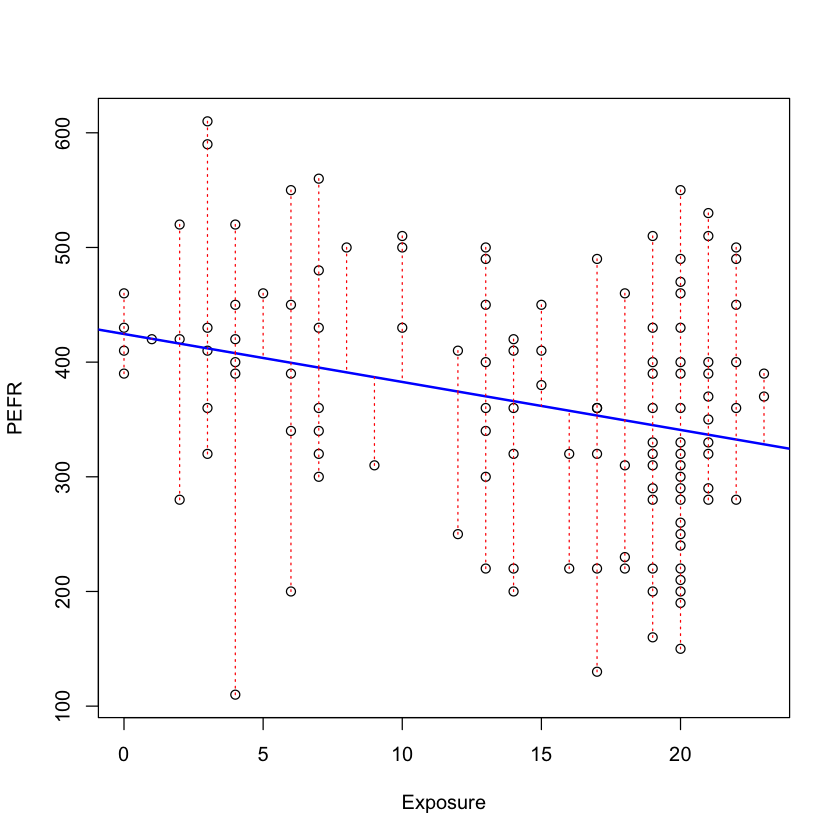

In [39]:
plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)
segments(lung1$Exposure, lung1$PEFR, lung1$Exposure, lung1$Fitted, col="red", lty=3)

###### done

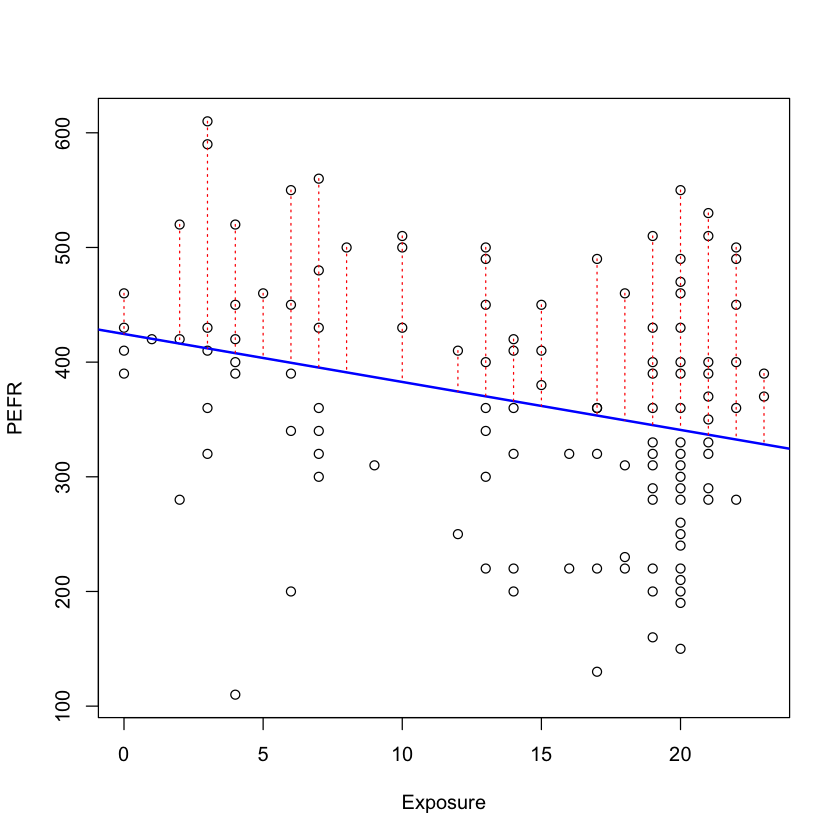

In [45]:
# 특정 exposure에서 적합값보다 큰 값들과의 잔차
lung1_true <- lung1 %>% filter(positive == TRUE)

plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)
segments(lung1_true$Exposure, lung1_true$PEFR, lung1_true$Exposure, lung1_true$Fitted, col="red", lty=3)

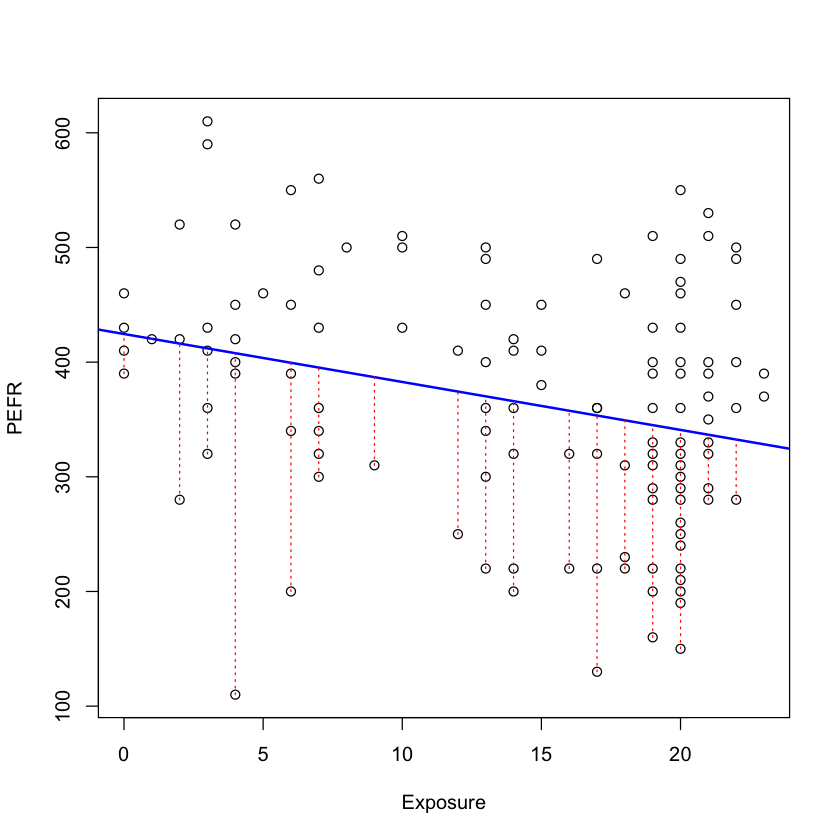

In [46]:
# 특정 exposure에서 적합값보다 작은 값들과의 잔차
lung1_false <- lung1 %>% filter(positive == FALSE)

plot(lung$Exposure, lung$PEFR, xlab="Exposure", ylab="PEFR")
abline(a=model$coefficients[1], b=model$coefficients[2], col="blue", lwd=2)
segments(lung1_false$Exposure, lung1_false$PEFR, lung1_false$Exposure, lung1_false$Fitted, col="red", lty=3)

### 🏠 주택 가격 데이터

In [3]:
house <- read.csv(file.path(PSDS_PATH, 'data', 'house_sales.csv'), sep='\t')

###### sneak peek 

In [4]:
head(house)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,⋯,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.9308364,300805,2,9373,⋯,3.00,6,7,1991,0,0,70000,229000,98002,FALSE
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.9292279,1076162,1,20156,⋯,3.75,4,10,2005,0,0,203000,590000,98166,TRUE
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.9779412,761805,1,26036,⋯,1.75,4,8,1947,0,0,183000,275000,98166,FALSE
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.9613971,442065,1,8618,⋯,3.75,5,7,1966,0,0,104000,229000,98168,FALSE
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.8079044,297065,1,8620,⋯,1.75,4,7,1948,0,0,104000,205000,98168,FALSE
6,2009-03-30,349900,3600090,Townhouse,2009-03-01,369800,0.8497243,411781,1,1012,⋯,1.50,2,8,2008,0,0,170000,207000,98144,TRUE


In [6]:
head(house[, c('AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade')])

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,300805,2400,9373,3.00,6,7
2,1076162,3764,20156,3.75,4,10
3,761805,2060,26036,1.75,4,8
4,442065,3200,8618,3.75,5,7
5,297065,1720,8620,1.75,4,7
6,411781,930,1012,1.50,2,8


###### done

In [4]:
house_lm <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=house, na.action=na.omit)

In [5]:
house_lm


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house, na.action = na.omit)

Coefficients:
  (Intercept)  SqFtTotLiving        SqFtLot      Bathrooms       Bedrooms  
   -5.219e+05      2.288e+02     -6.047e-02     -1.944e+04     -4.777e+04  
    BldgGrade  
    1.061e+05  


In [7]:
summary(house_lm)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1199479  -118908   -20977    87435  9473035 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.219e+05  1.565e+04 -33.342  < 2e-16 ***
SqFtTotLiving  2.288e+02  3.899e+00  58.694  < 2e-16 ***
SqFtLot       -6.047e-02  6.118e-02  -0.988    0.323    
Bathrooms     -1.944e+04  3.625e+03  -5.363 8.27e-08 ***
Bedrooms      -4.777e+04  2.490e+03 -19.187  < 2e-16 ***
BldgGrade      1.061e+05  2.396e+03  44.277  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261300 on 22681 degrees of freedom
Multiple R-squared:  0.5406,	Adjusted R-squared:  0.5405 
F-statistic:  5338 on 5 and 22681 DF,  p-value: < 2.2e-16


In [11]:
nrow(house)-5-1

[1] 22681

In [5]:
house_full <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType + NbrLivingUnits + SqFtFinBasement + YrBuilt + YrRenovated + NewConstruction, data=house, na.action=na.omit)

In [6]:
house_full


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType + NbrLivingUnits + SqFtFinBasement + 
    YrBuilt + YrRenovated + NewConstruction, data = house, na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
                6.182e+06                  1.986e+02  
                  SqFtLot                  Bathrooms  
                7.707e-02                  4.286e+04  
                 Bedrooms                  BldgGrade  
               -5.187e+04                  1.373e+05  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                2.997e+04                  9.286e+04  
           NbrLivingUnits            SqFtFinBasement  
                5.724e+03                  7.061e+00  
                  YrBuilt                YrRenovated  
               -3.574e+03                 -2.531e+00  
      NewConstructionTRUE  
               -2.489e+03  


#### 단계적 회귀

In [10]:
step_lm <- stepAIC(house_full, direction = 'both', trace=FALSE)

In [11]:
step_lm


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + 
    BldgGrade + PropertyType + SqFtFinBasement + YrBuilt, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
                6.179e+06                  1.993e+02  
                Bathrooms                   Bedrooms  
                4.240e+04                 -5.195e+04  
                BldgGrade  PropertyTypeSingle Family  
                1.372e+05                  2.291e+04  
    PropertyTypeTownhouse            SqFtFinBasement  
                8.448e+04                  7.047e+00  
                  YrBuilt  
               -3.565e+03  


#### 가중회귀

In [5]:
library(lubridate)

In [6]:
house$Year = year(house$DocumentDate)
house$Weight = house$Year - 2005 # 2005년으로부터 경과한 시간

In [7]:
# lm 함수의 weight parameter
house_wt <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=house, weight=Weight)

In [11]:
round(cbind(house_lm = house_lm$coefficients, house_wt = house_wt$coefficients), digits=3) # column bind

,house_lm,house_wt
(Intercept),-521871.368,-584189.329
SqFtTotLiving,228.831,245.024
SqFtLot,-0.060,-0.292
Bathrooms,-19442.840,-26085.970
Bedrooms,-47769.955,-53608.876
BldgGrade,106106.963,115242.435


#### 더미 변수 표현 
- 요인변수 'PropertyType': Multiplex, SingleFamily, Townhouse 

In [4]:
head(house[, 'PropertyType'])

[1] "Multiplex"     "Single Family" "Single Family" "Single Family"
[5] "Single Family" "Townhouse"

In [5]:
prop_type_dummies <- model.matrix(~PropertyType -1, data=house)
head(prop_type_dummies)

,PropertyTypeMultiplex,PropertyTypeSingle Family,PropertyTypeTownhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1


In [6]:
lm(AdjSalePrice ~SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType, data=house)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType, data = house)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -4.468e+05                  2.234e+02  
                  SqFtLot                  Bathrooms  
               -7.037e-02                 -1.598e+04  
                 Bedrooms                  BldgGrade  
               -5.089e+04                  1.094e+05  
PropertyTypeSingle Family      PropertyTypeTownhouse  
               -8.468e+04                 -1.151e+05  


#### 요인 수준이 많은 경우 
-  80개의 우편 번호 -> house_lm 회귀 결과의 잔차값의 중간값을 기준 -> 5개의 그룹으로 통합

In [7]:
table(house$ZipCode)


98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019 98022 
  358   180   241   293   133   460   112   291    56   163    85   242   188 
98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038 98039 98040 
  455    31   366   252   475   263   308   121   517   575   788    47   244 
98042 98043 98045 98047 98050 98051 98052 98053 98055 98056 98057 98058 98059 
  641     1   222    48     7    32   614   499   332   402     4   420   513 
98065 98068 98070 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 
  430     1    89   245   502   388   204   289   106   671   313   361   296 
98108 98109 98112 98113 98115 98116 98117 98118 98119 98122 98125 98126 98133 
  155   149   357     1   620   364   619   492   260   380   409   473   465 
98136 98144 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199 98224 
  310   332   287    40   358   193   332   216   266   101   225   393     3 
98288 98354 
    4     9 

In [11]:
residuals(house_lm)

1             2             3             4             5 
-1.237508e+05 -5.914541e+04  1.901087e+05 -1.987888e+05 -9.177500e+04 
            6             7             8             9            10 
-3.250434e+03 -1.720948e+05 -7.102212e+04  5.230968e+03  1.258985e+05 
           11            12            13            14            16 
-3.099841e+04 -8.608580e+04  1.349280e+05  1.474920e+05  1.986908e+04 
           18            20            21            22            23 
-1.676067e+05  2.246502e+05 -4.365319e+03 -2.702990e+05 -2.185251e+05 
           24            25            26            27            28 
 5.394211e+04  3.377029e+04 -1.798272e+05 -2.062644e+05 -1.494493e+05 
           29            30            31            32            33 
-1.788803e+05 -1.269400e+05 -2.642983e+05 -2.032539e+05 -6.169248e+04 
           34            35            36            37            38 
-2.093743e+05 -1.067134e+04 -1.250747e+05 -2.075178e+05 -9.727066e+04 
           39            40            41            42            43 
-9.162845e+04 -3.049839e+04 -2.339382e+05 -1.833509e+05 -2.479529e+05 
           44            45            46            47            50 
-1.505399e+05 -1.590250e+05 -2.804550e+05  1.792365e+04 -3.594636e+04 
           51            52            53            54            55 
-1.203494e+05 -1.067561e+05 -8.794199e+04  7.749928e+04  7.218903e+04 
           56            57            58            59            60 
 3.885493e+04  5.334851e+03  1.312155e+05  1.429643e+05  2.141370e+05 
           61            62            63            64            65 
-3.556744e+05  7.140206e+05  2.877222e+04  2.727491e+05 -2.560242e+04 
           66            67            68            70            71 
 1.028411e+05  2.077041e+05  8.686866e+04  1.605823e+05 -1.327397e+05 
           72            73            74            75            76 
 5.486403e+04  2.954770e+03 -2.352307e+04  1.408870e+04 -1.129838e+05 
           77            78            79            80            81 
-1.650352e+05 -6.793117e+04 -5.988373e+02 -7.089384e+05  9.593057e+04 
           82            83            84            85            86 
 2.201757e+04 -2.184882e+05  3.492755e+04 -2.784030e+05 -7.366467e+05 
           87            88            89            90            91 
 8.525142e+05  4.678173e+05  2.107196e+06 -1.980204e+05 -1.131341e+04 
           92            93            94            95            96 
 3.402935e+04 -5.231259e+04  2.720791e+04 -1.546346e+05 -1.486035e+05 
           97            98            99           111           112 
-1.699032e+05 -4.417657e+05 -2.201527e+05  9.068201e+04  2.429421e+05 
          113           114           115           116           117 
-1.296116e+05  1.309978e+05  3.351028e+04  2.763014e+04  4.704074e+04 
          118           119           120           121           122 
-2.764339e+04 -1.455586e+05 -2.725120e+05  9.632308e+04  4.302642e+04 
          123           124           125           126           127 
 1.444956e+05  2.019166e+05  1.190165e+05  7.907743e+04 -4.850532e+03 
          128           129           130           131           132 
 1.194163e+05  2.072323e+05 -4.136502e+04 -1.788471e+04  1.383765e+05 
          133           134           135           136           137 
-2.972884e+05  2.082821e+04 -1.632243e+05 -2.062573e+05  1.261877e+05 
          138           139           140           141           142 
-4.573568e+04  1.738368e+05  1.712255e+05  3.229196e+05  1.249101e+05 
          153           154           155           156           157 
-5.212508e+05 -2.046379e+05  2.248001e+04 -1.902924e+04  1.603475e+05 
          158           159           160           161           162 
 7.820363e+04 -4.030012e+05 -2.029053e+05 -2.646893e+05 -2.169497e+05 
          163           164           165           166           167 
-3.631960e+05 -2.800031e+05 -1.397275e+05  2.102276e+04 -2.430280e+05 
          168           169         

In [6]:
zip_groups <- house %>% # summarize에서 사용할 데이터 불러오기 
            # house에 새 칼럼 추가 
            mutate(resid = residuals(house_lm)) %>% # mutate: df에 칼럼 추가하거나 기존 칼럼 수정 
            # 새 df 생성 - 우편번호 기준으로 그룹 통계 계산 : 그룹 내 잔차 중간값, 그룹별 행 수
            group_by(ZipCode) %>%
            summarize(med_resid = median(resid), cnt = n()) %>%
            # 잔차 중간값 기준으로 요약통계 df 정렬 
            arrange(med_resid) %>%
            # 요약통계 df에 칼럼 추가 - 그룹별 행수 누적값, 이 값을 5분위 수로 분할
            # cumsum: 각 그룹의 행 수를 고려하여, 그룹 간 균형을 맞춘 구간을 생성 <- row_number() 써도 결과가 같지 않을까? 
            mutate(cum_cnt = cumsum(cnt), ZipGroup = factor(ntile(cum_cnt, 5)))

In [34]:
zip_groups

ZipCode,med_resid,cnt,cum_cnt,ZipGroup
<int>,<dbl>,<int>,<int>,<fct>
98057,-537321.64,4,4,1
98043,-307661.34,1,5,1
98092,-193569.18,289,294,1
98038,-150066.48,788,1082,1
98051,-142352.87,32,1114,1
98023,-141201.50,455,1569,1
98003,-131528.88,241,1810,1
98354,-131442.28,9,1819,1
98075,-130676.72,388,2207,1


###### cumsum vs. row_number()

###### done

In [7]:
house <- house %>%
        # house에다가 ZipCode, ZipGroup 칼럼을 ZipCode 기준으로 left join 
        left_join(select(zip_groups, ZipCode, ZipGroup), by='ZipCode')

In [36]:
house

DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,⋯,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,ZipGroup
<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<fct>
2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.9308364,300805,2,9373,⋯,6,7,1991,0,0,70000,229000,98002,FALSE,3
2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.9292279,1076162,1,20156,⋯,4,10,2005,0,0,203000,590000,98166,TRUE,3
2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.9779412,761805,1,26036,⋯,4,8,1947,0,0,183000,275000,98166,FALSE,3
2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.9613971,442065,1,8618,⋯,5,7,1966,0,0,104000,229000,98168,FALSE,3
2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.8079044,297065,1,8620,⋯,4,7,1948,0,0,104000,205000,98168,FALSE,3
2009-03-30,349900,3600090,Townhouse,2009-03-01,369800,0.8497243,411781,1,1012,⋯,2,8,2008,0,0,170000,207000,98144,TRUE,4
2013-08-28,327500,3800004,Single Family,2013-08-01,374300,0.8600643,380785,1,34465,⋯,3,8,1961,0,0,165000,227000,98178,FALSE,3
2007-05-24,347000,3800009,Single Family,2007-05-01,432100,0.9928768,349489,1,14659,⋯,4,7,1963,0,0,115000,154000,98178,FALSE,3
2006-09-22,220400,6600055,Single Family,2006-09-01,414800,0.9531250,231239,1,5324,⋯,2,6,1930,0,3,90000,75000,98032,FALSE,2


#### 상호 연관된 예측 변수 제거

In [12]:
step_lm$coefficients

(Intercept)             SqFtTotLiving                 Bathrooms 
             6.178645e+06              1.992776e+02              4.239616e+04 
                 Bedrooms                 BldgGrade PropertyTypeSingle Family 
            -5.194738e+04              1.371596e+05              2.291206e+04 
    PropertyTypeTownhouse           SqFtFinBasement                   YrBuilt 
             8.447916e+04              7.046975e+00             -3.565425e+03

In [14]:
update(step_lm, . ~ . - SqFtTotLiving - SqFtFinBasement - Bathrooms)


Call:
lm(formula = AdjSalePrice ~ Bedrooms + BldgGrade + PropertyType + 
    YrBuilt, data = house, na.action = na.omit)

Coefficients:
              (Intercept)                   Bedrooms  
                  4913973                      27151  
                BldgGrade  PropertyTypeSingle Family  
                   248998                     -19898  
    PropertyTypeTownhouse                    YrBuilt  
                   -47355                      -3212  


#### 교란 변수
- 위치 정보 고려 -> 우편 번호 

In [37]:
lm(AdjSalePrice ~  SqFtTotLiving + SqFtLot + 
     Bathrooms + Bedrooms + 
     BldgGrade + PropertyType + ZipGroup,
   data=house, na.action=na.omit)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade + PropertyType + ZipGroup, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -6.666e+05                  2.106e+02  
                  SqFtLot                  Bathrooms  
                4.550e-01                  5.928e+03  
                 Bedrooms                  BldgGrade  
               -4.168e+04                  9.854e+04  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                1.932e+04                 -7.820e+04  
                ZipGroup2                  ZipGroup3  
                5.332e+04                  1.163e+05  
                ZipGroup4                  ZipGroup5  
                1.784e+05                  3.384e+05  


#### 상호작용과 주효과

In [38]:
lm(formula = AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType, data = house, na.action = na.omit)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + 
    Bathrooms + Bedrooms + BldgGrade + PropertyType, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -4.853e+05                  1.148e+02  
                ZipGroup2                  ZipGroup3  
               -1.113e+04                  2.032e+04  
                ZipGroup4                  ZipGroup5  
                2.050e+04                 -1.499e+05  
                  SqFtLot                  Bathrooms  
                6.869e-01                 -3.619e+03  
                 Bedrooms                  BldgGrade  
               -4.180e+04                  1.047e+05  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                1.357e+04                 -5.884e+04  
  SqFtTotLiving:ZipGroup2    SqFtTotLiving:ZipGroup3  
                3.260e+01                  4.178e+01  
  SqFtTotLiving:ZipGroup4    SqFtTotLiving:ZipGro

In [39]:
lm(formula = AdjSalePrice ~ SqFtTotLiving + ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType, data = house, na.action = na.omit)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + ZipGroup + SqFtLot + 
    Bathrooms + Bedrooms + BldgGrade + PropertyType, data = house, 
    na.action = na.omit)

Coefficients:
              (Intercept)              SqFtTotLiving  
               -6.666e+05                  2.106e+02  
                ZipGroup2                  ZipGroup3  
                5.332e+04                  1.163e+05  
                ZipGroup4                  ZipGroup5  
                1.784e+05                  3.384e+05  
                  SqFtLot                  Bathrooms  
                4.550e-01                  5.928e+03  
                 Bedrooms                  BldgGrade  
               -4.168e+04                  9.854e+04  
PropertyTypeSingle Family      PropertyTypeTownhouse  
                1.932e+04                 -7.820e+04  


#### 특잇값

In [8]:
# house_lm -> zipCode
# 우편번호가 98105인 지역의 데이터 -> 회귀모형 
house_98105 <- house[house$ZipCode == 98105, ]
lm_98105 <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=house_98105)

In [27]:
rownames(house_98105)

[1] "827"   "1445"  "1446"  "1447"  "1458"  "1459"  "1460"  "1799"  "1800" 
 [10] "1862"  "1863"  "1864"  "1868"  "2097"  "2098"  "2099"  "2100"  "2101" 
 [19] "2103"  "2105"  "2106"  "2107"  "2108"  "2109"  "2377"  "4485"  "4486" 
 [28] "4768"  "4769"  "4867"  "4868"  "4869"  "4870"  "4871"  "4872"  "4873" 
 [37] "4874"  "4875"  "6240"  "6241"  "6242"  "6243"  "6244"  "6245"  "6246" 
 [46] "6247"  "6248"  "6249"  "6250"  "6251"  "6252"  "6253"  "6254"  "6255" 
 [55] "6256"  "6257"  "7726"  "7727"  "7728"  "8084"  "8085"  "8086"  "8087" 
 [64] "8338"  "8339"  "8340"  "8341"  "8342"  "8343"  "8344"  "8345"  "8346" 
 [73] "8347"  "8348"  "8349"  "8350"  "8351"  "8352"  "8353"  "8354"  "8391" 
 [82] "8392"  "8393"  "8394"  "8395"  "8396"  "8397"  "8398"  "8399"  "8400" 
 [91] "8401"  "8402"  "8403"  "8404"  "8408"  "8409"  "8410"  "8411"  "9893" 
[100] "9894"  "9895"  "10797" "10805" "10806" "10807" "10808" "10809" "10810"
[109] "10811" "10812" "10817" "10818" "10819" "10820" "10821" "10822" "10823"
[118] "10824" "11292" "11711" "11712" "12017" "12018" "12019" "12020" "12021"
[127] "12022" "12023" "12024" "12025" "12026" "12027" "12028" "12041" "12042"
[136] "12043" "12044" "12045" "12046" "12047" "12048" "12049" "12050" "12051"
[145] "12052" "12053" "12054" "12055" "12056" "12057" "12058" "12059" "12060"
[154] "12061" "12062" "12063" "12064" "12065" "12066" "12067" "12068" "12069"
[163] "12070" "12071" "12084" "12085" "12086" "13494" "13495" "13496" "13497"
[172] "13498" "13499" "13500" "13501" "13502" "13503" "13504" "13505" "13506"
[181] "13507" "13508" "13867" "14048" "14049" "14050" "14051" "14052" "14345"
[190] "14346" "14490" "14491" "14492" "14493" "14494" "14524" "14525" "14926"
[199] "14927" "14928" "15246" "15247" "15248" "15249" "15250" "15251" "15252"
[208] "15253" "15254" "15255" "15566" "15567" "15568" "15569" "15570" "15571"
[217] "16199" "16200" "16208" "16209" "16210" "17471" "17472" "17497" "17498"
[226] "17499" "17500" "17501" "17502" "18778" "19114" "19115" "19592" "19593"
[235] "19594" "19595" "19596" "19597" "19598" "19599" "20399" "20400" "20401"
[244] "20402" "20415" "20416" "20417" "20418" "20419" "20420" "20421" "20422"
[253] "20423" "20424" "20425" "20426" "20427" "20428" "20429" "20430" "20431"
[262] "20432" "20433" "20434" "20435" "20436" "20437" "20468" "20479" "20480"
[271] "20481" "20482" "20483" "20484" "21062" "21063" "21064" "21065" "21066"
[280] "21067" "21068" "21069" "21889" "21890" "21891" "21892" "21893" "21894"
[289] "21895" "21896" "21897" "22339" "22340" "22341" "22342" "22343" "22344"
[298] "22345" "22346" "22347" "22348" "22349" "22350" "22351" "22352" "22353"
[307] "22354" "22355" "22356" "22357" "22358" "22359" "22360"

In [8]:
# 표준화 잔차 구하기 
sresid <- rstandard(lm_98105)
# 가장 작은 잔차의 위치를 얻기 
idx <- order(sresid)
sresid[idx[1]]

20429 
-4.326732

In [9]:
# 특잇값 레코드 확인
house_98105[idx[1], c('AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade')]

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
,<dbl>,<int>,<int>,<dbl>,<int>,<int>
20429,119748,2900,7276,3,6,7


In [17]:
# 추정치 확인
predict(lm_98105, house_98105[idx[1], c('SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade')])

20429 
877501.6

In [20]:
class(resid)

[1] "function"

In [21]:
# 잔차 확인
resid(lm_98105)[idx[1]] # 119748 - 877501.619211581 (y - y_hat)

20429 
-757753.6

#### Bubble plot - 레코드별 영향력 확인 

In [22]:
std_resid <- rstandard(lm_98105) # 표준화잔차
cooks_D <- cooks.distance(lm_98105) # 쿡의 거리
hat_values <- hatvalues(lm_98105) # 햇 값 

###### subset check

In [23]:
cooks_D > 0.08

827  1445  1446  1447  1458  1459  1460  1799  1800  1862  1863  1864  1868 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 2097  2098  2099  2100  2101  2103  2105  2106  2107  2108  2109  2377  4485 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 4486  4768  4769  4867  4868  4869  4870  4871  4872  4873  4874  4875  6240 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 6241  6242  6243  6244  6245  6246  6247  6248  6249  6250  6251  6252  6253 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 6254  6255  6256  6257  7726  7727  7728  8084  8085  8086  8087  8338  8339 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 8340  8341  8342  8343  8344  8345  8346  8347  8348  8349  8350  8351  8352 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 8353  8354  8391  8392  8393  8394  8395  8396  8397  8398  8399  8400  8401 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 8402  8403  8404  8408  8409  8410  8411  9893  9894  9895 10797 10805 10806 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
10807 10808 10809 10810 10811 10812 10817 10818 10819 10820 10821 10822 10823 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
10824 11292 11711 11712 12017 12018 12019 12020 12021 12022 12023 12024 12025 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
12026 12027 12028 12041 12042 12043 12044 12045 12046 12047 12048 12049 12050 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
12051 12052 12053 12054 12055 12056 12057 12058 12059 12060 12061 12062 12063 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE 
12064 12065 12066 12067 12068 12069 12070 12071 12084 12085 12086 13494 13495 
FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
13496 13497 13498 13499 13500 13501 13502 13503 13504 13505 13506 13507 13508 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
13867 14048 14049 14050 14051 14052 14345 14346 14490 14491 14492 14493 14494 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
14524 14525 14926 14927 14928 15246 15247 15248 15249 15250 15251 15252 15253 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
15254 15255 15566 15567 15568 15569 15570 15571 16199 16200 16208 16209 16210 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
17471 17472 17497 17498 17499 17500 17501 17502 18778 19114 19115 19592 19593 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
19594 19595 19596 19597 19598 19599 20399 20400 20401 20402 20415 20416 20417 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
20418 20419 20420 20421 20422 20423 20424 20425 20426 20427 20428 20429 20430 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE 
20431 20432 20433 20434 20435 20436 20437 20468 20479 20480 20481 20482 20483 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
20484 21062 21063 21064 21065 21066 21067 21068 21069 21889 21890 21891 21892 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
21893 21894 21895 21896 21897 22339 22340 22341 22342 22343 22344 22345 22346 
FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
22347 22348 22349 22350 22351 22352 22353 22354 22355 22356 22357 22358 22359 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
22360 
FALSE

In [24]:
hat_values

827        1445        1446        1447        1458        1459 
0.050868942 0.014388336 0.009945454 0.015435176 0.018705535 0.007874593 
       1460        1799        1800        1862        1863        1864 
0.029694768 0.011578766 0.011578766 0.027983126 0.027983126 0.020804511 
       1868        2097        2098        2099        2100        2101 
0.023579837 0.008438075 0.019247702 0.019247702 0.013679682 0.012485335 
       2103        2105        2106        2107        2108        2109 
0.019268874 0.024477806 0.022967605 0.024389635 0.026666617 0.023109110 
       2377        4485        4486        4768        4769        4867 
0.125138443 0.010862510 0.021352794 0.011192244 0.011088067 0.005423845 
       4868        4869        4870        4871        4872        4873 
0.008778111 0.008778111 0.012984796 0.011827409 0.005440843 0.017697929 
       4874        4875        6240        6241        6242        6243 
0.016956805 0.010614438 0.008060336 0.013452511 0.016998493 0.015038529 
       6244        6245        6246        6247        6248        6249 
0.013782455 0.005321476 0.005321476 0.024313865 0.018635363 0.006178791 
       6250        6251        6252        6253        6254        6255 
0.011802809 0.005695796 0.014824867 0.014666736 0.018138540 0.017447731 
       6256        6257        7726        7727        7728        8084 
0.042542760 0.005504286 0.007915437 0.005851194 0.055777092 0.023293447 
       8085        8086        8087        8338        8339        8340 
0.015739154 0.018530939 0.019184121 0.006730075 0.005569150 0.014665876 
       8341        8342        8343        8344        8345        8346 
0.014665876 0.009840065 0.009931918 0.016114183 0.008204466 0.016848321 
       8347        8348        8349        8350        8351        8352 
0.010514535 0.004822683 0.015315716 0.018212042 0.018212042 0.011495039 
       8353        8354        8391        8392        8393        8394 
0.018635187 0.009297625 0.020093278 0.016639150 0.031408025 0.006608328 
       8395        8396        8397        8398        8399        8400 
0.005325100 0.006938110 0.006938110 0.017378170 0.023063011 0.023063011 
       8401        8402        8403        8404        8408        8409 
0.007570631 0.008701076 0.005551619 0.007814672 0.012179570 0.020297862 
       8410        8411        9893        9894        9895       10797 
0.023317375 0.030387596 0.035590970 0.006636417 0.009308064 0.007464396 
      10805       10806       10807       10808       10809       10810 
0.023456615 0.020110255 0.020110255 0.016832048 0.016832048 0.013842146 
      10811       10812       10817       10818       10819       10820 
0.012345128 0.012050880 0.008756895 0.008670433 0.007350836 0.018294231 
      10821       10822       10823       10824       11292       11711 
0.015763978 0.015763978 0.023569674 0.021849779 0.022879128 0.025607412 
      11712       12017       12018       12019       12020       12021 
0.025607412 0.009838943 0.011507721 0.009301271 0.012993527 0.009558873 
      12022       12023       12024       12025       12026       12027 
0.051941074 0.004658629 0.008435738 0.005886732 0.017829629 0.012470602 
      12028       12041       12042       12043       12044       12045 
0.012693533 0.017886892 0.013335227 0.011098287 0.006348731 0.006348731 
      12046       12047       12048       12049       12050       12051 
0.010289435 0.013574004 0.026701145 0.026701145 0.006203898 0.009969172 
      12052       12053       12054       12055       12056       12057 
0.006383392 0.006383392 0.006579605 0.020783035 0.006428272 0.006428272 
      12058       12059       12060       12061       12062       12063 
0.023457818 0.021984122 0.121085693 0.030594764 0.028626002 0.013504991 
      12064       12065       12066       12067       12068       12069 
0.018086693 0.037912366 0.014005249 0.022841448 0.023491542 0.055301076 
      12070       12071       12084       12085       12086       

###### done

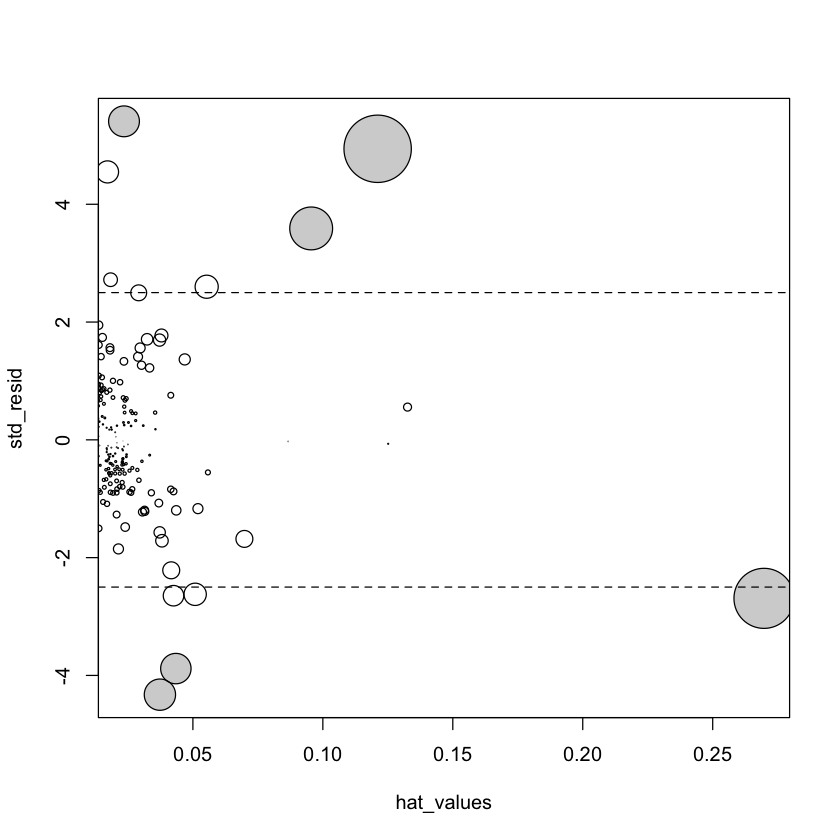

In [32]:
# condition: cooks_D > 0.08)
plot(subset(hat_values, cooks_D > 0.08), subset(std_resid, cooks_D > 0.08), 
     xlab = 'hat_values', ylab = 'std_resid',
     # 쿡의 거리에 비례해서 원의 크기가 커짐. point shape: filled circle
     cex = 10 * sqrt(subset(cooks_D, cooks_D > 0.08)), pch = 16, col = 'lightgrey')
points(hat_values, std_resid, cex=10*sqrt(cooks_D))
abline(h=c(-2.5, 2.5), lty=2)

In [33]:
# 영향력 큰 레코드를 제외하고 피팅했을 때 회귀계수 비교 (before)
summary(lm_98105)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house_98105)

Residuals:
    Min      1Q  Median      3Q     Max 
-757754  -91807   -9668   77586  953911 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -772549.86   98277.27  -7.861 6.51e-14 ***
SqFtTotLiving     209.60      24.41   8.587 4.54e-16 ***
SqFtLot            38.93       5.33   7.305 2.41e-12 ***
Bathrooms        2282.26   19983.57   0.114   0.9091    
Bedrooms       -26320.27   12881.09  -2.043   0.0419 *  
BldgGrade      130000.10   15234.12   8.533 6.63e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178500 on 307 degrees of freedom
Multiple R-squared:  0.7954,	Adjusted R-squared:  0.7921 
F-statistic: 238.7 on 5 and 307 DF,  p-value: < 2.2e-16


In [34]:
# 쿡의 거리 기준으로 영향력 큰 레코드 제외하고 다시 피팅 -> Bathrooms의 계수가 엄청 달라짐 
sub_lm_98105 <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade, subset=cooks_D< 0.08, data=house_98105)
summary(sub_lm_98105)


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = house_98105, subset = cooks_D < 
    0.08)

Residuals:
    Min      1Q  Median      3Q     Max 
-442099  -87535  -12711   74196  820250 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -647137.10   85939.31  -7.530 5.94e-13 ***
SqFtTotLiving     230.05      21.15  10.878  < 2e-16 ***
SqFtLot            33.14       5.43   6.104 3.19e-09 ***
Bathrooms      -16131.88   17101.31  -0.943   0.3463    
Bedrooms       -22887.87   10812.03  -2.117   0.0351 *  
BldgGrade      114870.56   12937.96   8.879  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147100 on 301 degrees of freedom
Multiple R-squared:  0.8096,	Adjusted R-squared:  0.8064 
F-statistic:   256 on 5 and 301 DF,  p-value: < 2.2e-16


#### 이분산성 확인

In [35]:
# 절대 잔차와 예측값 사이의 관계
df <- data.frame(resid=residuals(lm_98105), pred=predict(lm_98105))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


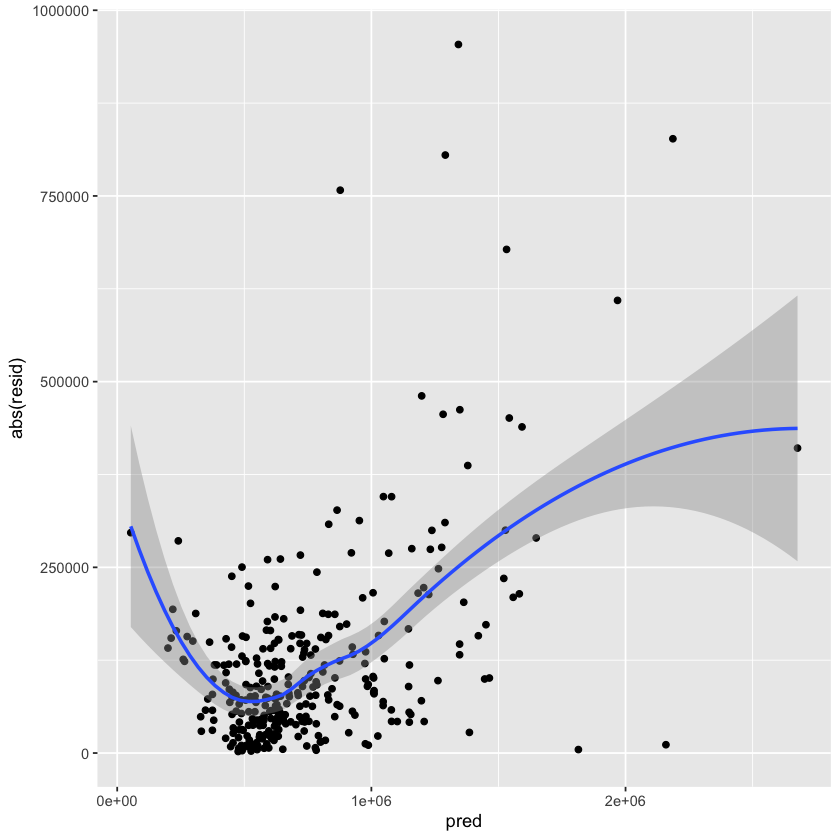

In [36]:
ggplot(df, aes(pred, abs(resid))) + geom_point() + geom_smooth()

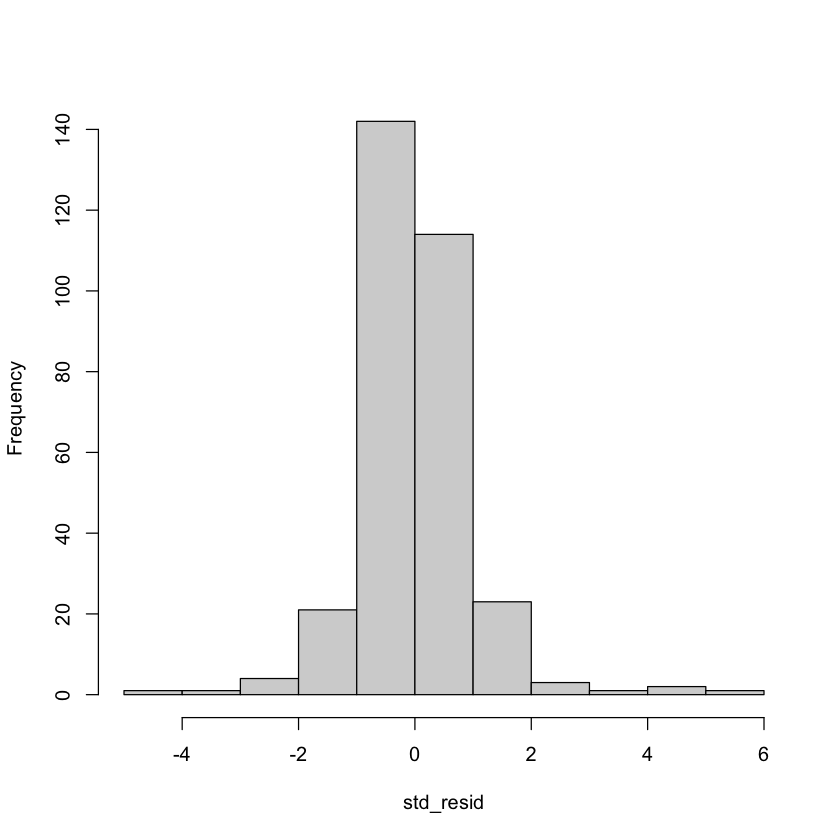

In [37]:
# 표준화잔차에 대한 히스토그램
hist(std_resid, main='')

#### 편잔차그림

In [10]:
# 기존 데이터에 대해 각 설명변수(X_i)의 기여도를 반환
terms <- predict(lm_98105, type='terms')

In [12]:
# 일반 잔차 + 개별 설명변수의 기여도 
partial_resid <- resid(lm_98105) + terms

###### 잔차, 기여도, 편잔차 따로 확인

In [17]:
terms

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
827,446479.784,98887.262,5401.2370,-68869.97,44025.59
1445,-31413.566,79615.271,-874.9894,-16229.43,44025.59
1446,-35605.613,74943.273,-874.9894,10090.84,-85974.51
1447,56619.420,94409.930,-874.9894,10090.84,-85974.51
1458,406655.338,148137.905,3118.9728,-42549.70,174025.69
1459,104827.959,11481.969,836.7087,10090.84,44025.59
1460,297662.118,-7984.688,1977.8407,10090.84,174025.69
1799,-203287.490,-74171.324,-2586.6876,36411.11,-85974.51
1800,-203287.490,-74171.324,-2586.6876,36411.11,-85974.51
1862,-241015.912,39903.289,-874.9894,36411.11,-215974.61


In [16]:
resid(lm_98105)

827        1445        1446        1447        1458        1459 
-456062.232 -158145.203  -62978.328 -186794.018  -99686.535 -132968.394 
       1460        1799        1800        1862        1863        1864 
 274290.873   19883.575   94432.575   57554.786   78940.786 -147647.141 
       1868        2097        2098        2099        2100        2101 
  99409.098   78173.369  126975.996  177153.996  167160.197  -97479.657 
       2103        2105        2106        2107        2108        2109 
 -48794.404  -43985.434  -89549.422  -50714.100 -147529.267  -56013.380 
       2377        4485        4486        4768        4769        4867 
 -11201.201   57720.640 -327011.110  177094.533   41856.989   -6403.145 
       4868        4869        4870        4871        4872        4873 
-140464.959  -42010.959 -119972.201  118663.548   37370.775  -99527.664 
       4874        4875        6240        6241        6242        6243 
-192314.000  -71624.222 -116816.038  115894.990  -63666.105  187877.234 
       6244        6245        6246        6247        6248        6249 
  10603.204    6746.842   12078.842  123469.601   31200.478   21434.291 
       6250        6251        6252        6253        6254        6255 
  26657.110  124177.534  147721.027  164574.951  -70466.061  -44307.924 
       6256        6257        7726        7727        7728        8084 
-152882.692   23312.912   12310.372  -46195.569  -95910.063   52082.662 
       8085        8086        8087        8338        8339        8340 
-120441.921   37534.228  -75947.655  139241.667  201537.096  130455.830 
       8341        8342        8343        8344        8345        8346 
 250302.830  -89607.598 -134719.214   65927.520  260352.220  142588.045 
       8347        8348        8349        8350        8351        8352 
  27368.574 -118568.869  150744.506 -131869.636 -106872.636   20778.262 
       8353        8354        8391        8392        8393        8394 
 -23339.879  -23032.680 -101006.146 -118548.330 -209663.863   22924.013 
       8395        8396        8397        8398        8399        8400 
  -6863.518 -243532.844  -91806.844  -17660.775  -31484.107   -3181.107 
       8401        8402        8403        8404        8408        8409 
-117315.035 -173580.238  170307.856 -312941.132  -58809.751  -65099.607 
       8410        8411        9893        9894        9895       10797 
 -73881.642  -64003.968   31526.200  -21481.749  -97411.572 -186774.502 
      10805       10806       10807       10808       10809       10810 
 -20045.197  -41034.867   22610.133  -36800.942  -24636.942  154718.044 
      10811       10812       10817       10818       10819       10820 
 119617.917   72756.486   14877.760  -79176.481   77859.174 -157489.305 
      10821       10822       10823       10824       11292       11711 
 108315.103  153801.103   44187.585 -101195.925  -65166.563 -155831.268 
      11712       12017       12018       12019       12020       12021 
 -92199.268 -122716.074   33873.785   77669.577  -43154.107  -13968.922 
      12022       12023       12024       12025       12026       12027 
-203004.303   45424.854   -5109.687 -152848.762   30667.509   29332.340 
      12028       12041       12042       12043       12044       12045 
  48880.805  -51111.181   38173.702  -17126.405 -140010.485    7174.515 
      12046       12047       12048       12049       12050       12051 
  19788.736  102317.590  -84034.680   79743.320   56209.620    3760.215 
      12052       12053       12054       12055       12056       12057 
 -49356.628  -66037.628 -109222.813   42423.063  -99712.297 -136320.297 
      12058       12059       12060       12061       12062       12063 
 235092.327  172737.848  826989.300 -215289.855  -89815.247   63904.205 
      12064       12065       12066       12067       12068       12069 
 276896.909  310280.469   54876.025  -27772.087  953910.599  451032.596 
      12070       12071       12084       12085       12086       

In [15]:
partial_resid

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
827,-9582.449,-357174.971,-450660.995,-524932.201,-412036.63955
1445,-189558.769,-78529.933,-159020.193,-174374.634,-114119.61053
1446,-98583.940,11964.945,-63853.317,-52887.490,-148952.83461
1447,-130174.598,-92384.087,-187669.007,-176703.180,-272768.52442
1458,306968.803,48451.371,-96567.562,-142236.234,74339.15810
1459,-28140.435,-121486.425,-132131.685,-122877.556,-88942.80121
1460,571952.991,266306.185,276268.714,284381.711,448316.56574
1799,-183403.915,-54287.749,17296.887,56294.682,-66090.93191
1800,-108854.915,20261.251,91845.887,130843.682,8458.06809
1862,-183461.126,97458.075,56679.796,93965.893,-158419.82065


###### done

In [13]:
df <- data.frame(SqFtTotLiving = house_98105[, 'SqFtTotLiving'], Terms = terms[, 'SqFtTotLiving'],
                 PartialResid = partial_resid[, 'SqFtTotLiving'])

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


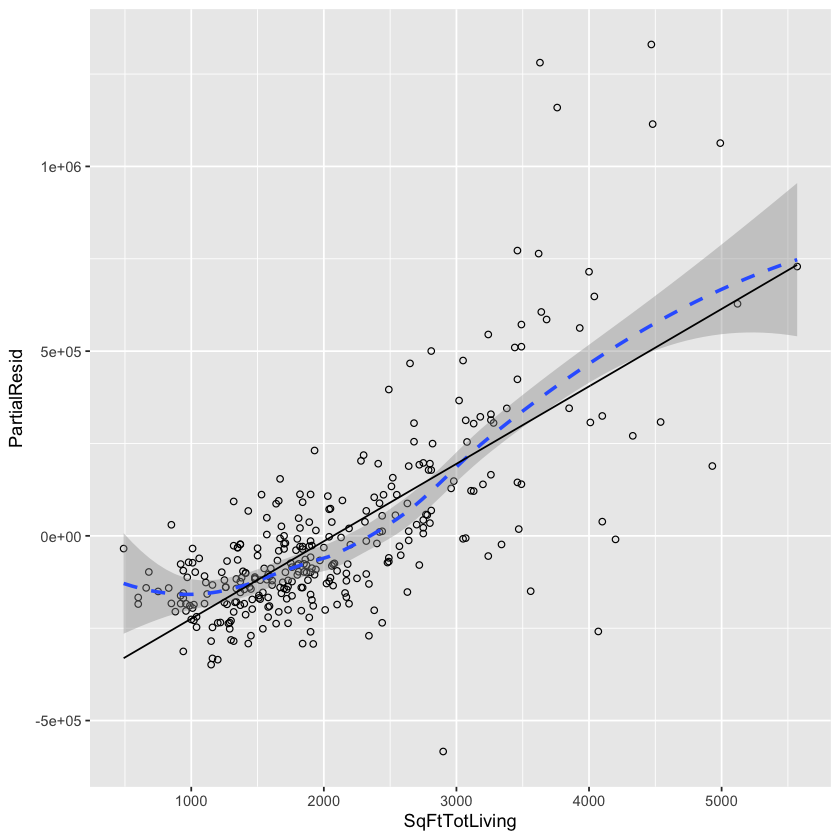

In [14]:
ggplot(df, aes(SqFtTotLiving, PartialResid)) + geom_point(shape=1) + scale_shape(solid=FALSE) + 
        geom_smooth(linetype=2) + geom_line(aes(SqFtTotLiving, Terms)) # 점선 추세선 + 실선 회귀선 

## 다항회귀와 스플라인 회귀 

In [18]:
# poly 함수
lm(AdjSalePrice ~ poly(SqFtTotLiving, 2) + SqFtLot + BldgGrade + Bathrooms + Bedrooms, data=house_98105)


Call:
lm(formula = AdjSalePrice ~ poly(SqFtTotLiving, 2) + SqFtLot + 
    BldgGrade + Bathrooms + Bedrooms, data = house_98105)

Coefficients:
            (Intercept)  poly(SqFtTotLiving, 2)1  poly(SqFtTotLiving, 2)2  
             -402530.47               3271519.49                776934.02  
                SqFtLot                BldgGrade                Bathrooms  
                  32.56                135717.06                 -1435.12  
               Bedrooms  
               -9191.94  


In [19]:
poly_lm = lm(AdjSalePrice ~ poly(SqFtTotLiving, 2) + SqFtLot + BldgGrade + Bathrooms + Bedrooms, data=house_98105)

In [22]:
# 다항회귀 한 뒤의 편잔차 그림 
terms <- predict(poly_lm, type='terms')
partial_resid <- resid(poly_lm) + terms

In [24]:
terms

,"poly(SqFtTotLiving, 2)",SqFtLot,BldgGrade,Bathrooms,Bedrooms
827,502256.80,82697.953,45961.69,-3396.3816,-24051.764
1445,-56012.10,66581.072,45961.69,550.2069,-5667.876
1446,-59124.79,62673.950,-89755.37,550.2069,3524.068
1447,16523.16,78953.627,-89755.37,550.2069,3524.068
1458,440330.37,123885.537,181678.75,-1961.2585,-14859.820
1459,62044.15,9602.201,45961.69,-526.1354,3524.068
1460,285169.26,-6677.476,181678.75,-1243.6969,3524.068
1799,-158185.58,-62028.380,-89755.37,1626.5493,12716.012
1800,-158185.58,-62028.380,-89755.37,1626.5493,12716.012
1862,-173631.47,33370.530,-225472.43,550.2069,12716.012


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


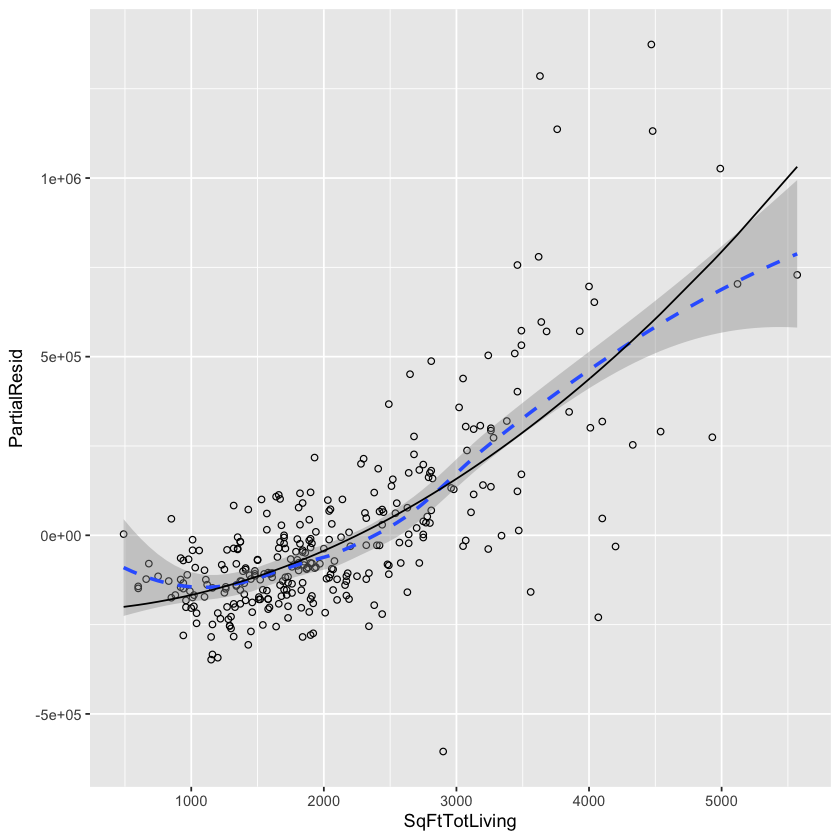

In [25]:
df <- data.frame(SqFtTotLiving = house_98105[, 'SqFtTotLiving'], Terms = terms[, 1], # 'poly(SqFtTotLiving, 2)'
                 PartialResid = partial_resid[, 1])
ggplot(df, aes(SqFtTotLiving, PartialResid)) + geom_point(shape=1) + scale_shape(solid=FALSE) + 
        geom_smooth(linetype=2) + geom_line(aes(SqFtTotLiving, Terms)) # 점선 추세선 + 실선 회귀선 

In [27]:
# 스플라인 회귀
# library(splines)
knots <- quantile(house_98105$SqFtTotLiving, p=c(.25, .5, .75))
knots

25%  50%  75% 
1410 1850 2570

In [28]:
lm_spline <- lm(AdjSalePrice ~bs(SqFtTotLiving, knots=knots, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=house_98105)

In [29]:
# 편잔차그림
terms <- predict(lm_spline, type='terms')
partial_resid <- resid(lm_spline) + terms
terms

,"bs(SqFtTotLiving, knots = knots, degree = 3)",SqFtLot,Bathrooms,Bedrooms,BldgGrade
827,555596.549,84644.749,-11308.1711,-15120.636,45536.78
1445,-75952.019,68148.460,1831.9008,-3563.227,45536.78
1446,-78541.848,64149.360,1831.9008,2215.478,-88925.60
1447,-2951.221,80812.278,1831.9008,2215.478,-88925.60
1458,501726.601,126801.932,-6529.9631,-9341.931,179999.15
1459,51325.998,9828.247,-1751.7552,2215.478,45536.78
1460,335835.363,-6834.671,-4140.8592,2215.478,179999.15
1799,-156506.805,-63488.593,5415.5568,7994.182,-88925.60
1800,-156506.805,-63488.593,5415.5568,7994.182,-88925.60
1862,-155246.685,34156.107,1831.9008,7994.182,-223387.97


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


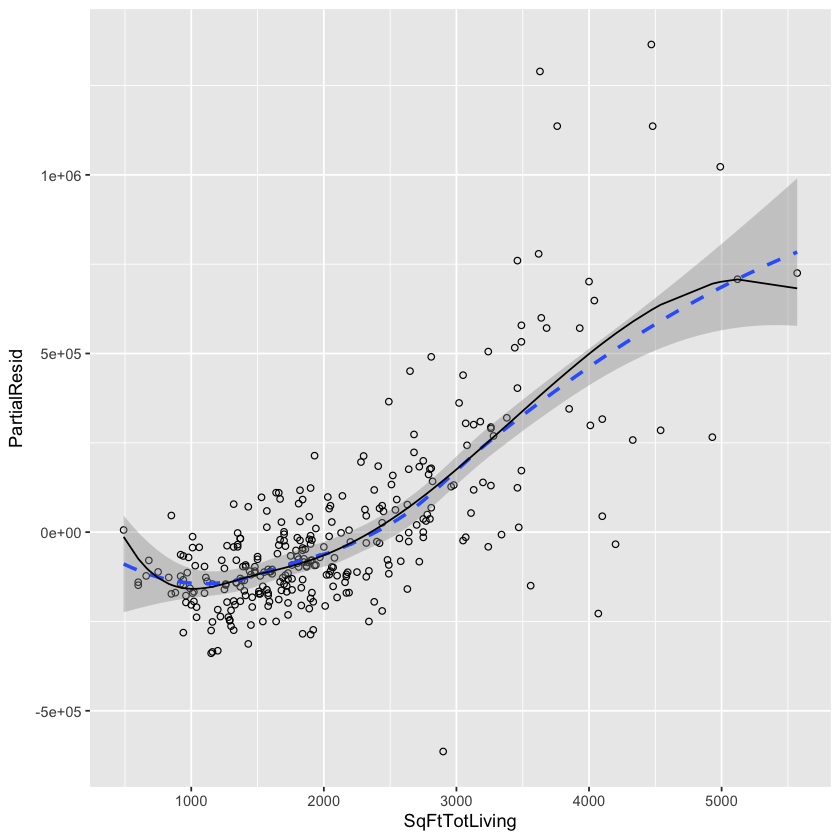

In [30]:
df <- data.frame(SqFtTotLiving = house_98105[, 'SqFtTotLiving'], Terms = terms[, 1], # bs(SqFtTotLiving, knots = knots, degree = 3)
                 PartialResid = partial_resid[, 1])
ggplot(df, aes(SqFtTotLiving, PartialResid)) + geom_point(shape=1) + scale_shape(solid=FALSE) + 
        geom_smooth(linetype=2) + geom_line(aes(SqFtTotLiving, Terms)) # 점선 추세선 + 실선 회귀선 

In [31]:
# 일반화 가법 모형 (GAM)
# library(mgcv)
lm_gam <- gam(AdjSalePrice ~ s(SqFtTotLiving) + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=house_98105)

In [35]:
terms <- predict(lm_gam, type='terms')
terms

,SqFtLot,Bathrooms,Bedrooms,BldgGrade,s(SqFtTotLiving)
827,249598.62,-5653.662,-37322.76,1052666.1,521023.170
1445,232545.30,-2198.646,-24881.84,1052666.1,-74152.961
1446,228411.16,-2198.646,-18661.38,921082.8,-76807.526
1447,245636.74,-2198.646,-18661.38,921082.8,-4178.047
1458,293179.33,-4397.293,-31102.30,1184249.4,481265.517
1459,172255.78,-3140.923,-18661.38,1052666.1,47069.997
1460,155030.20,-3769.108,-18661.38,1184249.4,347388.377
1799,96463.23,-1256.369,-12440.92,921082.8,-144569.162
1800,96463.23,-1256.369,-12440.92,921082.8,-144569.162
1862,197405.12,-2198.646,-12440.92,789499.6,-145743.920


In [36]:
partial_resid <- resid(lm_gam) + terms

In [37]:
df <- data.frame(SqFtTotLiving = house_98105[, 'SqFtTotLiving'],
                 Terms = terms[, 5], # s(SqFtTotLiving)
                 PartialResid = partial_resid[, 5])

In [40]:
length(row_number(df))

[1] 313

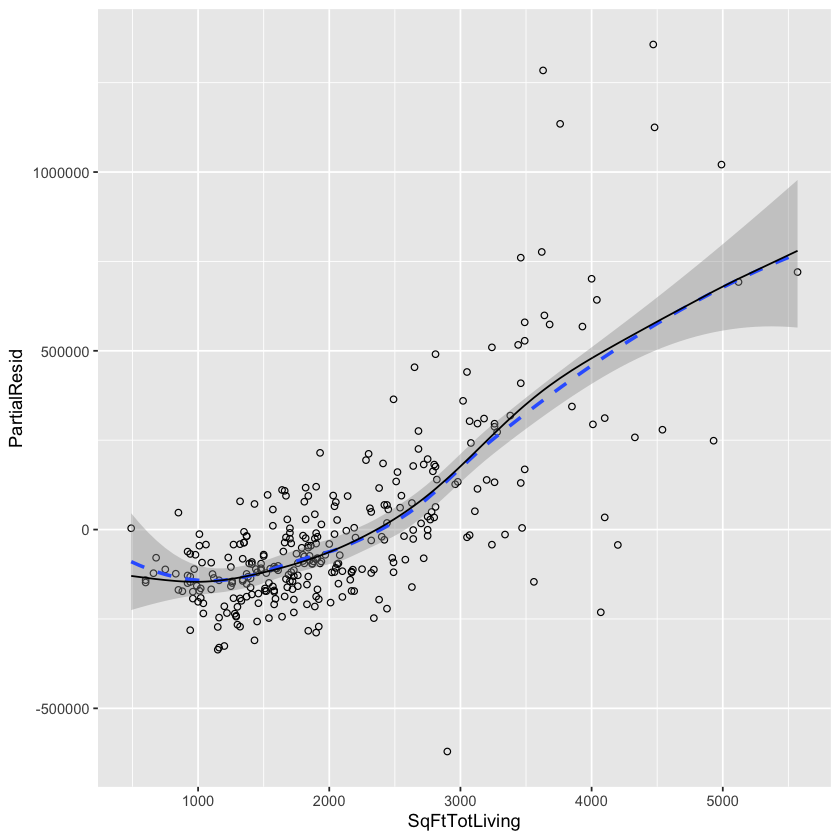

In [41]:
graph <- ggplot(df, aes(SqFtTotLiving, PartialResid)) +
  geom_point(shape=1) + scale_shape(solid = FALSE) +
    #gam인데 왜 method를 'loess'로 평활화? 데이터 포인트가 1000개 미만이라 그런가? 
  geom_smooth(linetype=2, formula=y~x, method='loess') + # geom_smooth formula, method가 추가됨 
  geom_line(aes(SqFtTotLiving, Terms)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
graph